In [44]:
import pandas as pd
import numpy as np

In [45]:
file_path_claim = "C://previous laptop//PG_Certification_in_Data_Science//Classes - Term 2//2 Case Studies//3. Case studies (Four)//Case Study 3 - Insurance Claims Case Study//"
file_name_claim = "claims.csv"

file_path_cust = "C://previous laptop//PG_Certification_in_Data_Science//Classes - Term 2//2 Case Studies//3. Case studies (Four)//Case Study 3 - Insurance Claims Case Study//"
file_name_cust = "cust_demographics.csv"

file_path_claim + file_name_claim
file_path_cust + file_name_cust

'C://previous laptop//PG_Certification_in_Data_Science//Classes - Term 2//2 Case Studies//3. Case studies (Four)//Case Study 3 - Insurance Claims Case Study//cust_demographics.csv'

In [46]:
claim_main = pd.read_csv(file_path_claim + file_name_claim)
cust_main = pd.read_csv(file_path_cust + file_name_cust)

In [47]:
claim = claim_main.copy()
cust = cust_main.copy()

In [48]:
claim.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No


In [7]:
cust.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold


In [8]:
claim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   claim_id             1100 non-null   int64  
 1   customer_id          1100 non-null   int64  
 2   incident_cause       1100 non-null   object 
 3   claim_date           1100 non-null   object 
 4   claim_area           1100 non-null   object 
 5   police_report        1100 non-null   object 
 6   claim_type           1100 non-null   object 
 7   claim_amount         1035 non-null   object 
 8   total_policy_claims  1090 non-null   float64
 9   fraudulent           1100 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 86.1+ KB


In [9]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CUST_ID      1085 non-null   int64 
 1   gender       1085 non-null   object
 2   DateOfBirth  1085 non-null   object
 3   State        1085 non-null   object
 4   Contact      1085 non-null   object
 5   Segment      1085 non-null   object
dtypes: int64(1), object(5)
memory usage: 51.0+ KB


In [ ]:
1. Import claims_data.csv and cust_data.csv which is provided to you and 
combine the two datasets appropriately to create a 360-degree view of 
the data. Use the same for the subsequent questions.

In [ ]:
# to get 360 degree view, we will use the outer join so that no data is lost between both the tables

In [49]:
claim_final = pd.merge(left=claim, right=cust, left_on='customer_id', right_on='CUST_ID',how='outer')

In [50]:
claim_final.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,54004764.0,21868593.0,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,21868593.0,Female,12-Jan-79,VT,789-916-8172,Platinum
1,33985796.0,75740424.0,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No,75740424.0,Female,13-Jan-70,ME,265-543-1264,Silver
2,53522022.0,30308357.0,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver
3,63017412.0,30308357.0,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver
4,13015401.0,47830476.0,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No,47830476.0,Female,01-May-86,MA,413-187-7945,Silver


In [51]:
claim_final.shape

(1107, 16)

In [52]:
claim_final.duplicated().sum()

0

In [53]:
claim_final.isnull().sum()

claim_id                7
customer_id             7
incident_cause          7
claim_date              7
claim_area              7
police_report           7
claim_type              7
claim_amount           72
total_policy_claims    17
fraudulent              7
CUST_ID                15
gender                 15
DateOfBirth            15
State                  15
Contact                15
Segment                15
dtype: int64

In [ ]:
2. Perform a data audit for the datatypes and find out if there are any 
mismatch within the current datatypes of the columns and their 
business significance.

In [23]:
claim_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1107 entries, 0 to 1106
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   claim_id             1100 non-null   float64
 1   customer_id          1100 non-null   float64
 2   incident_cause       1100 non-null   object 
 3   claim_date           1100 non-null   object 
 4   claim_area           1100 non-null   object 
 5   police_report        1100 non-null   object 
 6   claim_type           1100 non-null   object 
 7   claim_amount         1035 non-null   object 
 8   total_policy_claims  1090 non-null   float64
 9   fraudulent           1100 non-null   object 
 10  CUST_ID              1092 non-null   float64
 11  gender               1092 non-null   object 
 12  DateOfBirth          1092 non-null   object 
 13  State                1092 non-null   object 
 14  Contact              1092 non-null   object 
 15  Segment              1092 non-null   o

In [17]:
# Yes there are few mismatch in the datatype of the following columns:
# 1. claim_id, customer_id, total_policy_claims, CUST_ID, Contact should be in 'int' datatype
# 2. claim_date, DateOfBirth should be in 'datetime' datatype
# 3. claim_amount should be in 'float' datatype

# convert CUST_ID to int --- not necessary as we already have customer_id
# convert Contact to int --- we can leave this because we are not going to use it in analysis

In [ ]:
3. Convert the column claim_amount to numeric. Use the appropriate 
modules/attributes to remove the '$' sign.

In [54]:
claim_final['claim_amount'] = claim_final['claim_amount'].str.replace('$','',regex=True).astype('float')

In [55]:
claim_final['claim_amount'].dtype

dtype('float64')

In [ ]:
4. Of all the injury claims, some of them have gone unreported with the 
police. Create an alert flag (1,0) for all such claims.

In [56]:
claim_final['flag'] = np.where(claim_final['police_report'].str.lower()=='unknown',1,0)
claim_final.head(2)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,flag
0,54004764.0,21868593.0,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No,21868593.0,Female,12-Jan-79,VT,789-916-8172,Platinum,0
1,33985796.0,75740424.0,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No,75740424.0,Female,13-Jan-70,ME,265-543-1264,Silver,1


In [ ]:
5. One customer can claim for insurance more than once and in each claim,
multiple categories of claims can be involved. However, customer ID 
should remain unique. 
Retain the most recent observation and delete any duplicated records in
the data based on the customer ID column.

In [57]:
claim_final.sort_values(by='claim_date',ascending=False,ignore_index=True,inplace=True)

In [58]:
claim_final.duplicated(subset=['customer_id']).sum()

13

In [11]:
claim_final.shape

(1107, 16)

In [59]:
claim_final.drop_duplicates(subset=['customer_id'],inplace=True)

In [60]:
claim_final.duplicated(subset=['customer_id']).sum()

0

In [14]:
claim_final.shape

(1094, 16)

In [ ]:
6. Check for missing values and impute the missing values with an 
appropriate value. (mean for continuous and mode for categorical)

In [ ]:
# we can consider 'claim amount' as continous, all other variables need to be considered as categorical
# because the values of those variables are discrete in nature

In [20]:
claim_final.isna().sum()

claim_id                1
customer_id             1
incident_cause          1
claim_date              1
claim_area              1
police_report           1
claim_type              1
claim_amount            0
total_policy_claims    11
fraudulent              1
CUST_ID                15
gender                 15
DateOfBirth            15
State                  15
Contact                15
Segment                15
dtype: int64

In [13]:
claim_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094 entries, 0 to 1100
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   claim_id             1093 non-null   float64
 1   customer_id          1093 non-null   float64
 2   incident_cause       1093 non-null   object 
 3   claim_date           1093 non-null   object 
 4   claim_area           1093 non-null   object 
 5   police_report        1093 non-null   object 
 6   claim_type           1093 non-null   object 
 7   claim_amount         1028 non-null   float64
 8   total_policy_claims  1083 non-null   float64
 9   fraudulent           1093 non-null   object 
 10  CUST_ID              1079 non-null   float64
 11  gender               1079 non-null   object 
 12  DateOfBirth          1079 non-null   object 
 13  State                1079 non-null   object 
 14  Contact              1079 non-null   object 
 15  Segment              1079 non-null   o

In [61]:
# filling the nulls in the 'claim_amount' column with the mean() 
claim_final['claim_amount'] = claim_final['claim_amount'].fillna(claim_final['claim_amount'].mean())

In [62]:
claim_final.columns

Index(['claim_id', 'customer_id', 'incident_cause', 'claim_date', 'claim_area',
       'police_report', 'claim_type', 'claim_amount', 'total_policy_claims',
       'fraudulent', 'CUST_ID', 'gender', 'DateOfBirth', 'State', 'Contact',
       'Segment', 'flag'],
      dtype='object')

In [63]:
# for other variables filling the nulls with the mode of that particular variable
for x in claim_final.columns:
    claim_final[x] = claim_final[x].fillna(claim_final[x].mode().loc[0])

In [64]:
claim_final.isna().sum()

claim_id               0
customer_id            0
incident_cause         0
claim_date             0
claim_area             0
police_report          0
claim_type             0
claim_amount           0
total_policy_claims    0
fraudulent             0
CUST_ID                0
gender                 0
DateOfBirth            0
State                  0
Contact                0
Segment                0
flag                   0
dtype: int64

In [ ]:
7. Calculate the age of customers in years. Based on the age, categorize the
customers according to the below criteria
Children < 18
Youth 18-30
Adult 30-60
Senior > 60

In [ ]:
# changing the datatype of 'date of birth' to datetime to calculate the age
# considering the date '01-01-2020' as the reference to calculate the age of the customer

In [65]:
claim_final['DateOfBirth'].dtypes

dtype('O')

In [66]:
claim_final['DateOfBirth'] = pd.to_datetime(claim_final['DateOfBirth'], format = '%d-%b-%y')

In [67]:
claim_final['claim_date'] = pd.to_datetime(claim_final['claim_date'], format = '%m/%d/%Y')

In [68]:
claim_final['DateOfBirth'].info()

<class 'pandas.core.series.Series'>
Int64Index: 1094 entries, 0 to 1100
Series name: DateOfBirth
Non-Null Count  Dtype         
--------------  -----         
1094 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 17.1 KB


In [69]:
def age_group(x):
    if ((pd.to_datetime('01-01-2020') - x) / np.timedelta64(1,'Y')) <= 18.0:
        return('Children')
    elif ((pd.to_datetime('01-01-2020') - x) / np.timedelta64(1,'Y')) > 18.0 and ((pd.to_datetime('01-01-2020') - x) / np.timedelta64(1,'Y')) <= 30.0:
        return('Youth')
    elif ((pd.to_datetime('01-01-2020') - x )/ np.timedelta64(1,'Y')) > 30.0 and ((pd.to_datetime('01-01-2020') - x) / np.timedelta64(1,'Y')) <= 60.0:
        return('Adult')
    else:
        return('Senior')

In [70]:
claim_final['age_group'] = claim_final[['DateOfBirth']].applymap(age_group)

In [23]:
claim_final.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,flag,age_group
0,54004764.0,21868593.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593.0,Female,1979-01-12,VT,789-916-8172,Platinum,0,Adult
1,33985796.0,75740424.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424.0,Female,1970-01-13,ME,265-543-1264,Silver,1,Adult
2,53522022.0,30308357.0,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,30308357.0,Female,1984-03-11,TN,798-631-4758,Silver,0,Adult
3,63017412.0,30308357.0,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,30308357.0,Female,1984-03-11,TN,798-631-4758,Silver,0,Adult
4,13015401.0,47830476.0,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,47830476.0,Female,1986-05-01,MA,413-187-7945,Silver,0,Adult


In [ ]:
8. What is the average amount claimed by the customers from various 
segments?

In [71]:
claim_final.groupby('Segment')[['Segment','claim_amount']].agg({'claim_amount':np.mean})

,claim_amount
Segment,
Gold,12705.278356
Platinum,12369.713701
Silver,12264.078822


In [ ]:
9. What is the total claim amount based on incident cause for all the claims
that have been done at least 20 days prior to 1st of October, 2018.


In [54]:
twentydays = claim_final[(pd.to_datetime('01-10-2018') - claim_final['claim_date']) >= np.timedelta64(20,'D')]

In [55]:
twentydays.groupby('incident_cause')[['incident_cause','claim_amount']].agg({'claim_amount':np.sum})

,claim_amount
incident_cause,
Crime,4.038125e+05
Driver error,1.944347e+06
Natural causes,7.127496e+05
Other causes,2.275930e+06
Other driver error,1.849538e+06


In [ ]:
10. How many adults from TX, DE and AK claimed insurance for driver 
related issues and causes? 

In [72]:
claim_final[(claim_final['age_group'] == 'Adult') & 
            (claim_final['State'].isin(['TX', 'DE', 'AK'])) & 
            (claim_final['incident_cause'].isin(['Driver error', 'Other driver error']))].shape[0]

22

In [ ]:
11. Draw a pie chart between the aggregated value of claim amount based 
on gender and segment. Represent the claim amount as a percentage on
the pie chart.

In [42]:
import matplotlib.pyplot as plt

In [91]:
gender_data = claim_final.groupby('gender')['claim_amount'].sum()
segment_data = claim_final.groupby('Segment')['claim_amount'].sum()

In [92]:
gender_data

gender
Female    6.388412e+06
Male      7.237369e+06
Name: claim_amount, dtype: float64

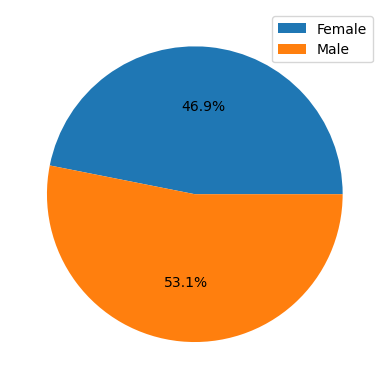

In [96]:
plt.pie(gender_data, autopct='%1.1f%%')
plt.legend(list(gender_data.index))
plt.show()

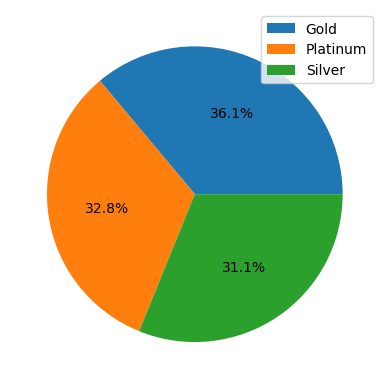

In [97]:
plt.pie(segment_data, autopct='%1.1f%%')
plt.legend(list(segment_data.index))
plt.show()

In [ ]:
12. Among males and females, which gender had claimed the most for any 
type of driver related issues? E.g. This metric can be compared using a 
bar chart

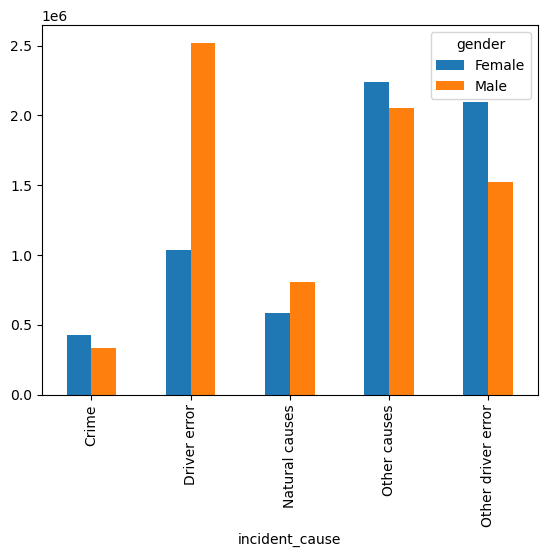

In [101]:
claim_final.pivot_table(index='incident_cause', 
                        columns='gender', values='claim_amount', aggfunc='sum').plot(kind='bar')
plt.show()

In [ ]:
13. Which age group had the maximum fraudulent policy claims? Visualize 
it on a bar chart.

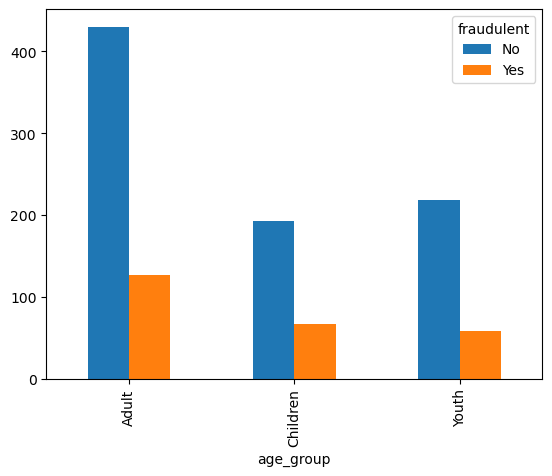

In [109]:
claim_final.pivot_table(index='age_group', 
                        columns='fraudulent', values='customer_id', aggfunc='count').plot(kind='bar')
plt.show()

In [ ]:
14. Visualize the monthly trend of the total amount that has been claimed 
by the customers. Ensure that on the “month” axis, the month is in a 
chronological order not alphabetical order. 

In [24]:
import datetime as dt

<Axes: xlabel='claim_date'>

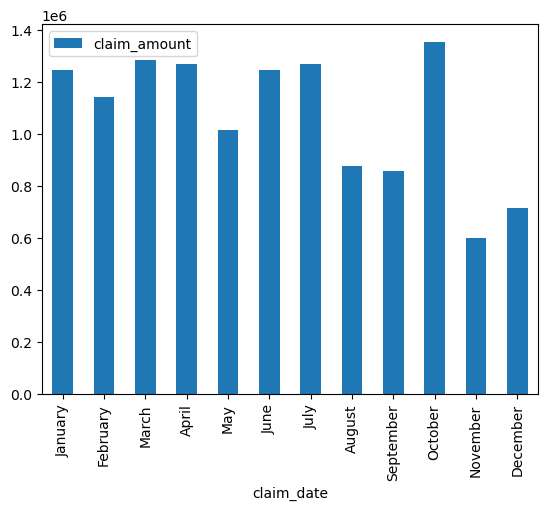

In [43]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November',
 'December']
claim_final.pivot_table(index= claim_final['claim_date'].dt.month_name(), 
                        values='claim_amount', aggfunc='sum').reindex(months).plot(kind='bar')

In [ ]:
15. What is the average claim amount for gender and age categories and 
suitably represent the above using a facetted bar chart, one facet that 
represents fraudulent claims and the other for non-fraudulent claims.

In [20]:
import seaborn as sns

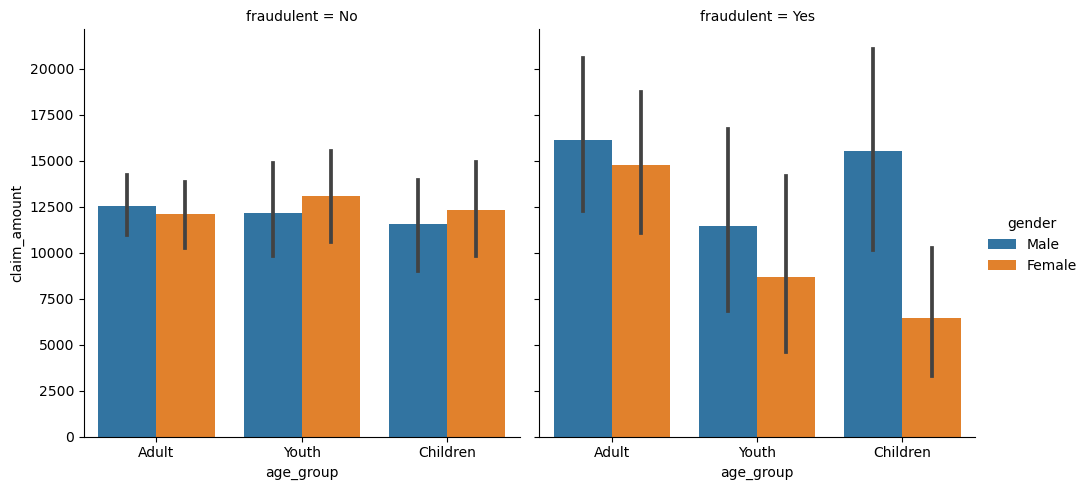

In [42]:
sns.catplot(x='age_group', y='claim_amount', hue= 'gender', data=claim_final, 
            col='fraudulent', estimator='mean', kind='bar', sharex=True)
plt.show()


In [ ]:
Based on the conclusions from exploratory analysis as well as suitable 
statistical tests, answer the below questions. Please include a detailed 
write-up on the parameters taken into consideration, the Hypothesis 
testing steps, conclusion from the p-values and the business implications of 
the statements. 

In [78]:
import matplotlib.pyplot as plt
from scipy import stats as stats

In [ ]:
16. Is there any similarity in the amount claimed by males and females?

In [43]:
# gender is categorical variable (2 categories) and claim amount is numeric data type now. 
# Hence we can use independent sample t-test for 2 samples

In [44]:
ca = 'claim_amount'

#filtering the data based on loan length
s1 = claim_final.loc[claim_final['gender'] == 'Male', ca]
s2 = claim_final.loc[claim_final['gender'] == 'Female', ca]

# display mean of both the segments
print('mean of s1:', s1.mean(),'| mean of s2:', s2.mean())

mean of s1: 12786.870760061047 | mean of s2: 12099.264757251503


In [47]:
# Ho: There is similarity in amount claimed by males and females
# Ha: There is no similarity in amount claimed by males and females
# CI: 99%, p_value = 0.01

#perform the test
stats.ttest_ind(s1,s2)

Ttest_indResult(statistic=0.8513943029589899, pvalue=0.3947370161525008)

In [48]:
# Conclusion: Since p_value is greater than 0.01, we DON'T REJECT the NULL HYPOTHESIS.
# Hence there is similarity in amount claimed by males and females

In [ ]:
17. Is there any relationship between age category and segment?

In [ ]:
# age category and segment both are categorical variable. 
# hence we can use chi-sq test for the hypothesis testing

In [49]:
# get the observation frequency from the dataset
obs_fq = pd.crosstab(claim_final['age_group'], claim_final['Segment'])
obs_fq

Segment,Gold,Platinum,Silver
age_group,,,
Adult,203,177,177
Children,96,83,81
Youth,88,101,88


In [50]:
# Ho: There is relationship between age_category and segment
# Ha: There is no relationship between age_category and segment
# CI: 99%, p_value: 0.01

# performing the test
stats.chi2_contingency(obs_fq)

Chi2ContingencyResult(statistic=2.748744526411803, pvalue=0.600712294197092, dof=4, expected_freq=array([[197.03747715, 183.79981718, 176.16270567],
       [ 91.97440585,  85.7952468 ,  82.23034735],
       [ 97.988117  ,  91.40493601,  87.60694698]]))

In [51]:
# Conclusion: Since p_value is greater than 0.01, we DON'T REJECT the NULL HYPOTHESIS.
# Hence there is relationship between age_category and segment

In [ ]:
18. The current year has shown a significant rise in claim amounts as 
compared to 2016-17 fiscal average which was $10,000.

In [52]:
# claim amount is numerical data type and we want to compare it with fiscal_year 2016-17
# We can consider year 2016-17 average as population mean and can use ttest 1 sample

In [25]:
this_year = claim_final[(claim_final['claim_date'] >= pd.to_datetime('01-04-2017', dayfirst=True))
                        & (claim_final['claim_date'] <= pd.to_datetime('31-03-2018', dayfirst=True))]
this_year.shape

(581, 17)

In [26]:
this_year['claim_amount'].mean()

12996.691602429732

In [64]:
sample_mean = this_year['claim_amount'].mean()
pop_mean = 10000
print("Population mean=", pop_mean, ' | ', "Sample mean=", sample_mean)

Population mean= 10000  |  Sample mean= 12996.691602429732


In [66]:
# Ho: There is significant rise in claim amount as compared to year 2016-17 
# Ha: There is no significant rise in claim amount as compared to year 2016-17 
# CI: 95%, p_value: 0.05

# performing the test
stats.ttest_1samp(a=this_year['claim_amount'], popmean = pop_mean)

TtestResult(statistic=5.276579437944255, pvalue=1.8620011442370195e-07, df=580)

In [67]:
# Conclusion: Since p_value is less than 0.01, we REJECT the NULL HYPOTHESIS.
# Hence there is no significant rise in claim amount as compared to year 2016-17 

In [ ]:
19. Is there any difference between age groups and insurance claims?

In [27]:
claim_final.head(1)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,age_group
0,88944238.0,93822307.0,Natural causes,2017-12-30,Auto,No,Material only,2940.0,1.0,No,93822307.0,Male,1987-11-15,NE,534-856-2654,Platinum,Adult


In [33]:
claim_final.groupby('age_group').agg({'claim_amount':np.mean})

,claim_amount
age_group,
Adult,13025.853411
Children,11603.586987
Youth,12106.309296


In [ ]:
# since age groups are categorical in nature and claim amount is numeric in nature and also we have 3 categories
# we can go ahead with ANOVA test method

In [29]:
ca = 'claim_amount'

#filtering the data based on loan length
s1 = claim_final.loc[claim_final['age_group'] == 'Adult', ca]
s2 = claim_final.loc[claim_final['age_group'] == 'Children', ca]
s3 = claim_final.loc[claim_final['age_group'] == 'Youth', ca]

# display mean of both the segments
print('mean of s1:', s1.mean(),'| mean of s2:', s2.mean(), '| mean of s3:', s3.mean())

mean of s1: 13025.853411480346 | mean of s2: 11603.586987428913 | mean of s3: 12106.309296380057


In [31]:
# Ho: There is difference in amount claimed by different age_groups
# Ha: There is no difference in amount claimed by different age_groups
# CI: 95%, p_value = 0.05

#perform the test
stats.f_oneway(s1,s2,s3)

F_onewayResult(statistic=1.1333298852762959, pvalue=0.3223381235490621)

In [ ]:
# Conclusion: Since p_value is greater than 0.05, we DON'T REJECT the NULL HYPOTHESIS.
# Hence there is difference in amount claimed by different age_groups.

In [ ]:
20. Is there any relationship between total number of policy claims and the 
claimed amount?

In [39]:
# since claim amount is numeric and total number of policy claims is numeric. 
# we can use the correlation method for the hypothesis testing

In [73]:
claim_final.head(1)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,flag,age_group
0,88944238.0,93822307.0,Natural causes,2017-12-30,Auto,No,Material only,2940.0,1.0,No,93822307.0,Male,1987-11-15,NE,534-856-2654,Platinum,0,Adult


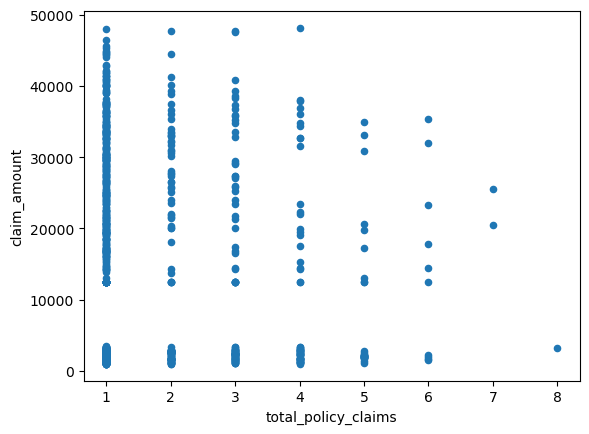

In [80]:
# Relationship between total numer of policy claims and claimed amount
claim_final.plot(kind='scatter', x='total_policy_claims', y='claim_amount')
plt.show()

In [76]:
claim_final.loc[:,['total_policy_claims','claim_amount']].corr()

,total_policy_claims,claim_amount
total_policy_claims,1.000000,-0.020547
claim_amount,-0.020547,1.000000


In [79]:
# H0: There is relationship between policy claims and claimed amount
# Ha: There is no relationship between policy claims and claimed amount

# CI: 95%, p-value: 0.05

# perform the test
stats.pearsonr(claim_final['total_policy_claims'],claim_final['claim_amount'])

PearsonRResult(statistic=-0.02054732077002433, pvalue=0.4971941575768153)

In [ ]:
# Conclusion: since p-value is very high compared to 0.05, we DON'T REJECT the NULL HYPOTHESIS.
# Hence There is relationship between policy claims and claimed amount